# Machine Learning Notebook About Diabetes

## 1: Preprocessing 

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read CSV file**

In [3]:
data = pd.read_csv(r'diabetes_prediction_dataset2.csv')

In [4]:
data.shape

(100000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:

# sns.scatterplot(x="Glucose",y="Insulin",hue='Outcome',data=data)
# plt.show()
# ! need to be modified

## 2: Data Cleaning

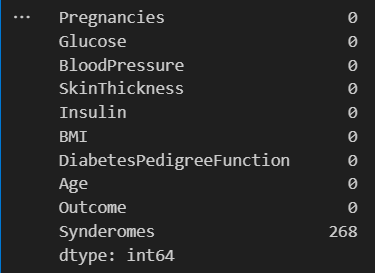

In [10]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

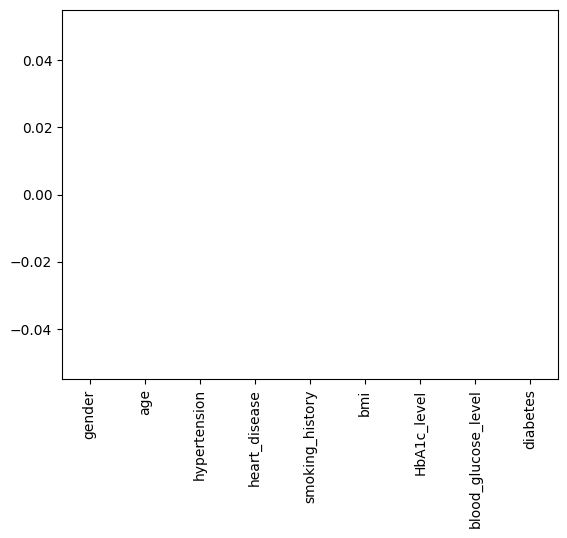

In [11]:
data.isnull().sum().plot(kind='bar')

In [12]:
print ("Number of duplicated rows :", data.duplicated().sum())

Number of duplicated rows : 3857


In [13]:
data = data.drop_duplicates() # ! inplace: removes the column permenantly...
print ("Number of dublicate rows :", data.duplicated().sum())
# if the column have null values more than 30%, so we have to drop the column

Number of dublicate rows : 0


In [14]:
for col in ['gender','smoking_history', 'diabetes'] :
    print (f'Number of Column {col} is: ' , data[col].nunique())
    print (f'Number of Column {col} is: ' , data[col].unique())

Number of Column gender is:  2
Number of Column gender is:  ['Female' 'Male']
Number of Column smoking_history is:  6
Number of Column smoking_history is:  ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Number of Column diabetes is:  2
Number of Column diabetes is:  [0 1]


In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['smoking_history'] = label.fit_transform(data['smoking_history'])

In [16]:
print(data['smoking_history'].unique(),
       data['gender'].unique())

[4 0 1 3 2 5] [0 1]


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96143 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96143 non-null  int32  
 1   age                  96143 non-null  float64
 2   hypertension         96143 non-null  int64  
 3   heart_disease        96143 non-null  int64  
 4   smoking_history      96143 non-null  int32  
 5   bmi                  96143 non-null  float64
 6   HbA1c_level          96143 non-null  float64
 7   blood_glucose_level  96143 non-null  int64  
 8   diabetes             96143 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.6 MB


In [18]:
# data['gender']= data['gender'].replace({"Male":0,"Female":1})
# ? we don't need ! 
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


**Visualization**

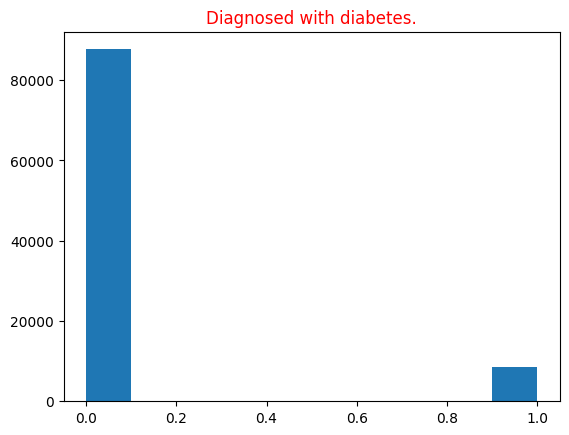

In [19]:
plt.hist(data['diabetes'], bins=10)
plt.title("Diagnosed with diabetes.", color='r')
plt.show()

In [20]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [21]:
plt.pie(data.info)
plt.title("Diagnosed with diabetes.", color='r')
plt.show()

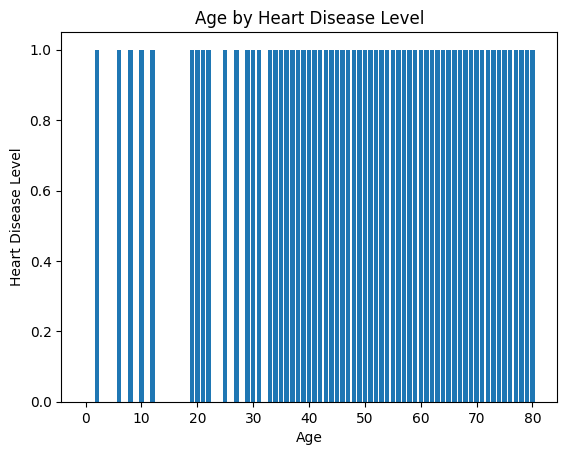

In [23]:
plt.bar(data['age'], data['heart_disease'])
plt.xlabel('Age')
plt.ylabel('Heart Disease Level')
plt.title('Age by Heart Disease Level')
plt.show()

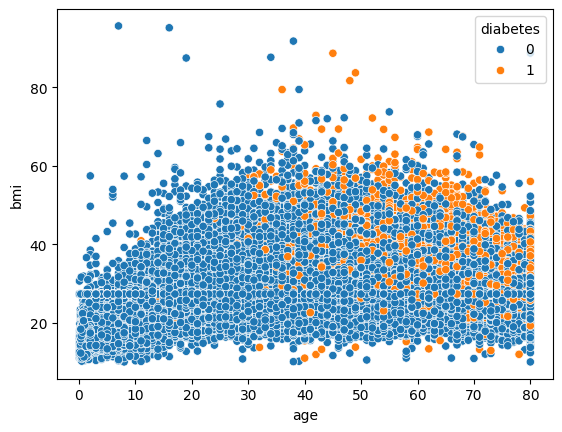

In [24]:
sns.scatterplot(x="age",y= "bmi",hue='diabetes',data= data)
plt.show()

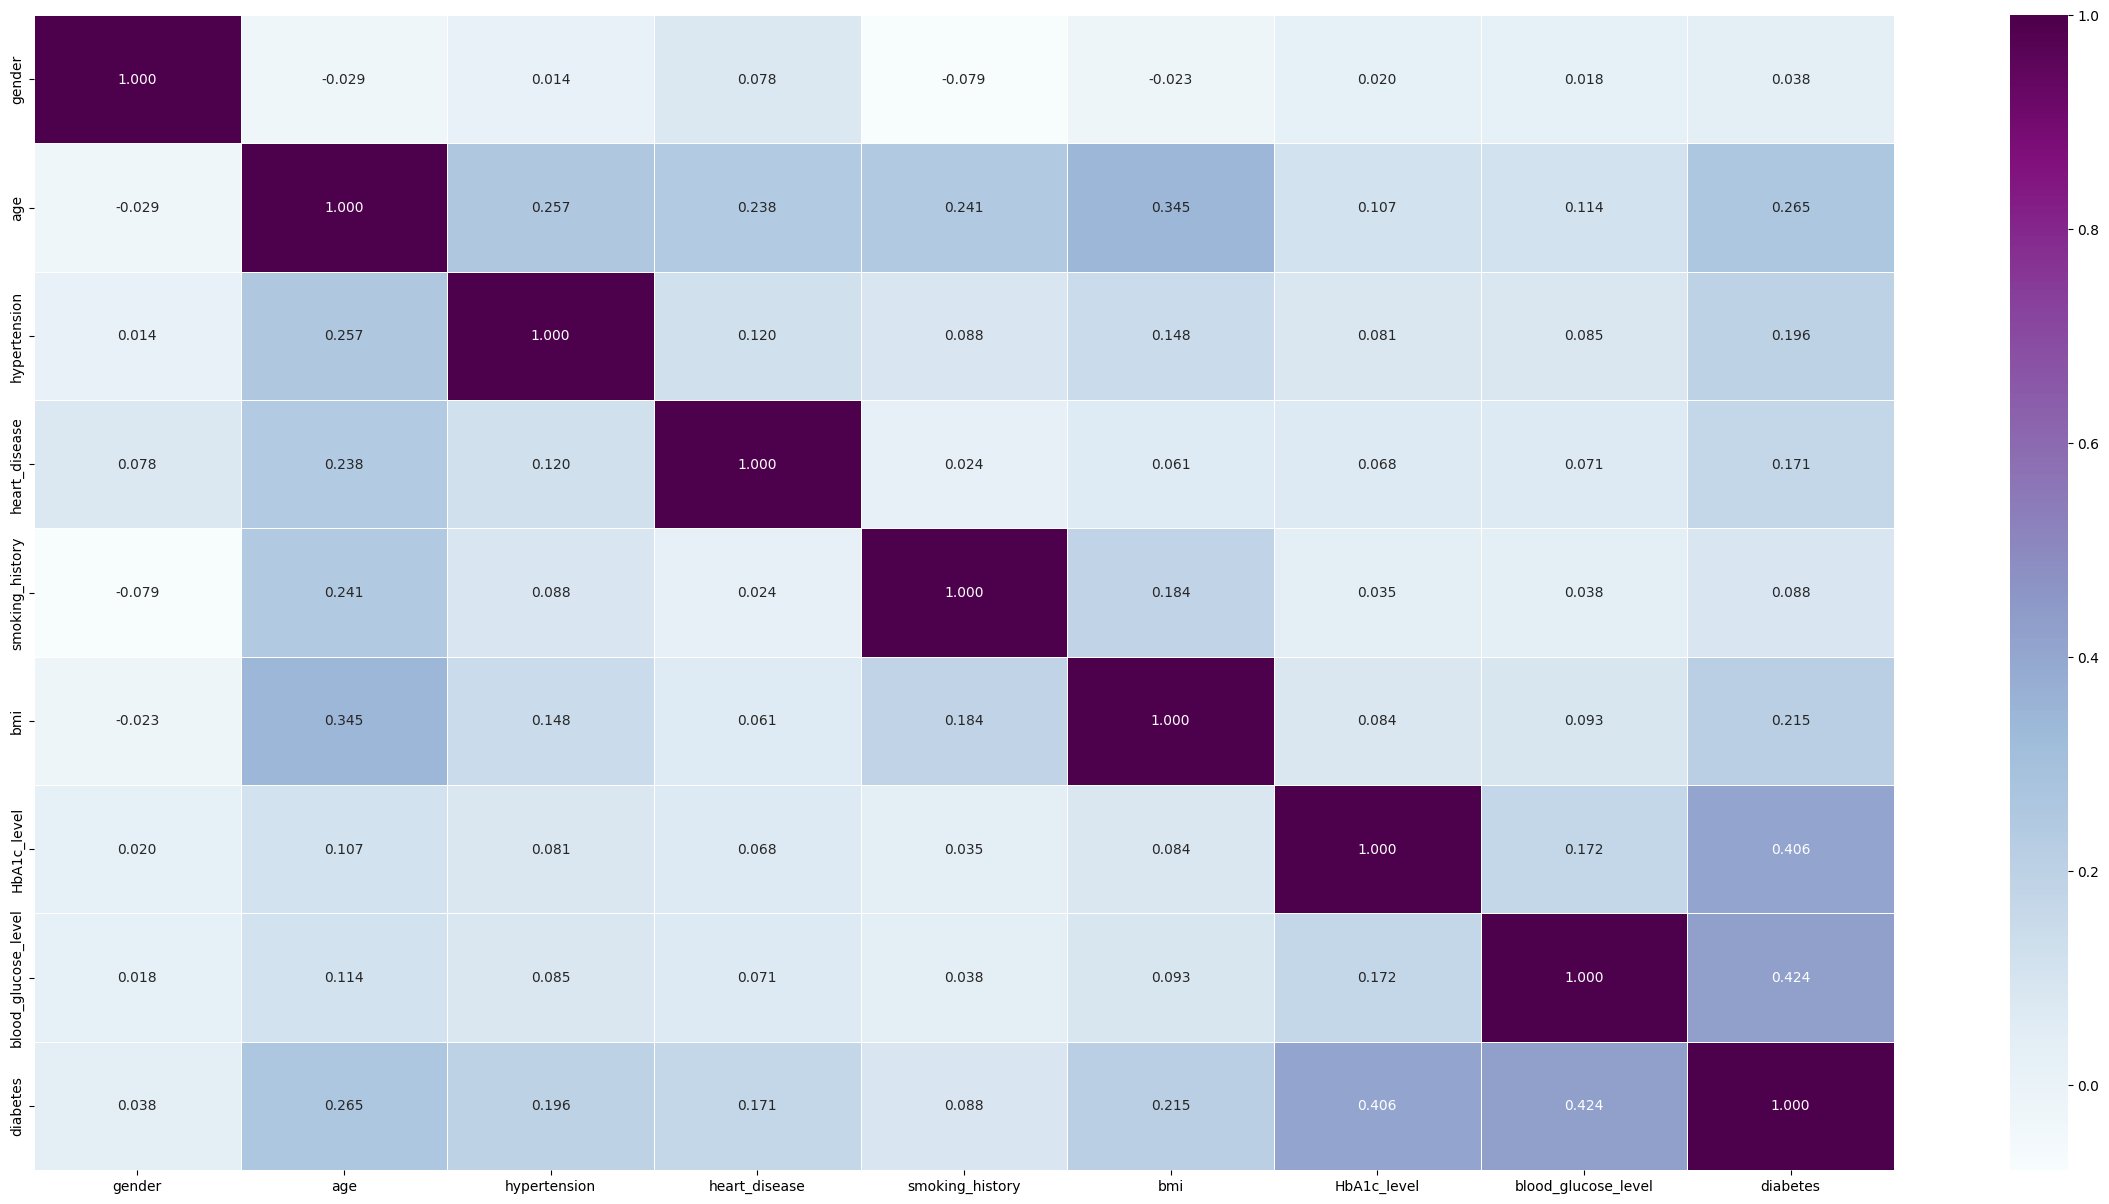

In [ ]:
plt.figure(figsize=(30,15))
# data_encoded= pd.get_dummies(data) 
sns.heatmap(data.corr(), annot =True,linewidth="0.5",fmt=".3f",cmap='BuPu')
plt.show()

In [25]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


**Spilting Data && Oversampling**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# my_scaler = StandardScaler()
# x_scaler_SD = my_scaler.fit_transform(x)
# x_scaler_SD.min(),x_scaler_SD.max()
# ! Normaliztion: (Standardization, MinMaxScaler)
# ! Standardization

In [ ]:
# from sklearn.feature_selection import SelectKBest

# f=SelectKBest(k=15)
# my_data1=f.fit_transform(data,y)
# my_data1.shape
# ! Feature Selection

In [ ]:
# from sklearn.decomposition import PCA
# pc=PCA(n_components=64)
# data=pc.fit_transform(x,y)
# ! Dimension Reduction

In [26]:
x= data.drop(columns=["diabetes"], axis= 1)
y= data["diabetes"] # Target

In [31]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=0,stratify=y)

from imblearn.over_sampling import SMOTE # - To increase the size of the dataset by oversampling.
smote = SMOTE(random_state=42)
# x0, y0 = smote.fit_resample(x, y)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# x_test_resampled, y_test_resampled = smote.fit_resample(x_test, y_test)

In [32]:
x_train.shape, y_train.shape

((72107, 8), (72107,))

In [33]:
x_test.shape , y_test.shape 

((24036, 8), (24036,))

## Model Building && Machine Learning

### 1. KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(x_train,y_train)
print ( 'KNNModel Train Score is :', knnmodel.score(x_train , y_train) )
print ( 'KNNModel Test Score is :', knnmodel.score(x_test , y_test) )

KNNModel Train Score is : 0.9583812944651698
KNNModel Test Score is : 0.9499084706273923


In [36]:
y_pred1 = knnmodel.predict (x_test)
print('actual Output : ' , (y_test[:10].tolist()))
print('predict Output : ' , (y_pred1[:10].tolist()))

actual Output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
predict Output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test , y_pred1)
cm

array([[21779,   136],
       [ 1068,  1053]], dtype=int64)

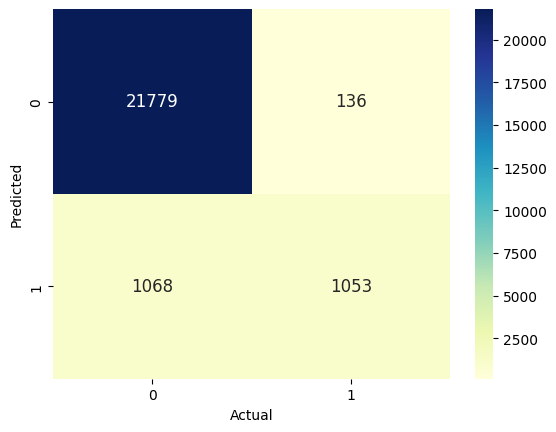

In [38]:
import seaborn as sns 
sns.heatmap (cm , annot_kws= {"size" :12 },annot= True , fmt="g" , cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [39]:
print ( classification_report (y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     21915
           1       0.89      0.50      0.64      2121

    accuracy                           0.95     24036
   macro avg       0.92      0.75      0.80     24036
weighted avg       0.95      0.95      0.94     24036



### 2. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(x_train , y_train)
print ('NBModel Train Score is : ' , NBModel.score(x_train,y_train))
print ('NBModel Test Score is : ' , NBModel.score(x_test,y_test))

NBModel Train Score is :  0.9019790034254649
NBModel Test Score is :  0.9028124479946746


In [41]:
y_pred2 = NBModel.predict(x_test)
print('actual Output : ' , (y_test[:10].tolist()))
print('predict Output : ' , (y_pred2[:10].tolist()))

actual Output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
predict Output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [42]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test , y_pred2)
cm

array([[20293,  1622],
       [  714,  1407]], dtype=int64)

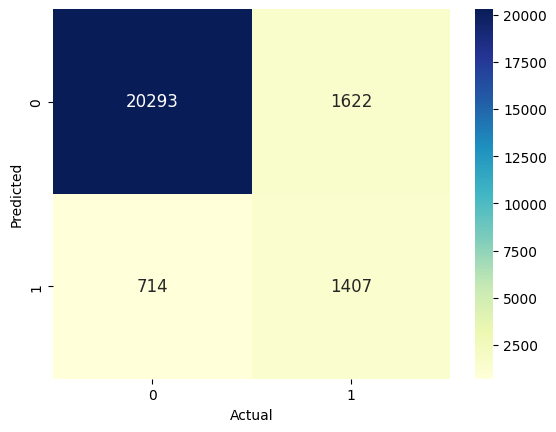

In [43]:
import seaborn as sns 
sns.heatmap (cm , annot_kws= {"size" :12 },annot= True , fmt="g" , cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [44]:
print ( classification_report (y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21915
           1       0.46      0.66      0.55      2121

    accuracy                           0.90     24036
   macro avg       0.72      0.79      0.75     24036
weighted avg       0.92      0.90      0.91     24036



### 3. Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='gini') 
DTModel.fit(x_train,y_train)
print('DTModel Train Score is : ',DTModel.score(x_train,y_train))
print('DTModel Test Score is : ',DTModel.score(x_test,y_test))

DTModel Train Score is :  0.9993481908829933
DTModel Test Score is :  0.9490347811615909


In [50]:
y_pred=DTModel.predict(x_test)
print('actual Output  : ',(y_test[:15].tolist()))
print('predict output : ',y_pred[:15].tolist())

actual Output  :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predict output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [51]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21250,   665],
       [  560,  1561]], dtype=int64)

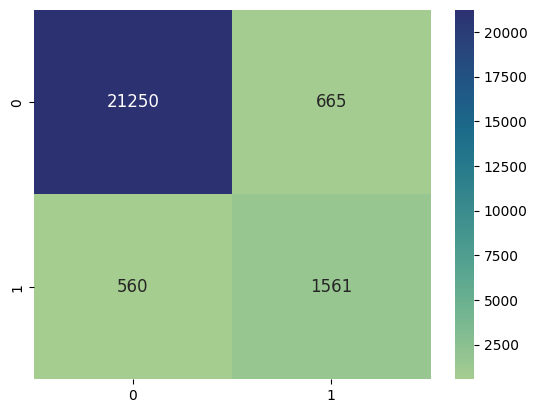

In [52]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21915
           1       0.70      0.74      0.72      2121

    accuracy                           0.95     24036
   macro avg       0.84      0.85      0.85     24036
weighted avg       0.95      0.95      0.95     24036



### 4. Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20 ,criterion='gini',max_depth=50)
RFModel.fit(x_train,y_train)
print('DTModel Train Score is : ',RFModel.score(x_train,y_train))
print('DTModel Test Score is : ',RFModel.score(x_test,y_test))

DTModel Train Score is :  0.9972263441829503
DTModel Test Score is :  0.9682975536694958


In [58]:
y_pred=RFModel.predict(x_test)

In [59]:
print('actual Output  : ',(y_test[:15].tolist()))
print('predict output : ',y_pred[:15].tolist())

actual Output  :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predict output :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [60]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21830,    85],
       [  677,  1444]], dtype=int64)

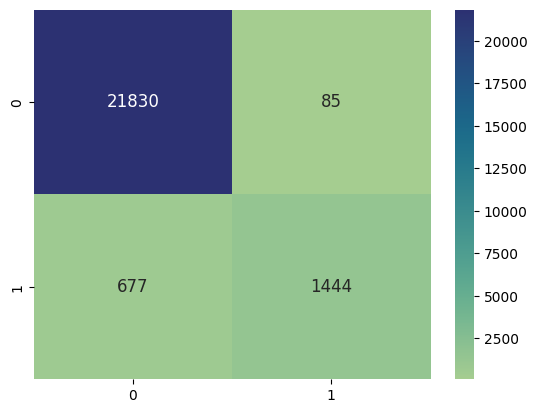

In [61]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21915
           1       0.94      0.68      0.79      2121

    accuracy                           0.97     24036
   macro avg       0.96      0.84      0.89     24036
weighted avg       0.97      0.97      0.97     24036



### 5. Linear regression

In [65]:
from sklearn.neighbors import KNeighborsRegressor
# x_train_imputed = pd.DataFrame(x_train).fillna(pd.DataFrame(x_train).mean()).values 
# y_train_imputed = pd.DataFrame(y_train).fillna(pd.DataFrame(y_train).mean()).values
# x_test_imputed = pd.DataFrame(x_test).fillna(pd.DataFrame(x_test).mean()).values
# y_test_imputed = pd.DataFrame(y_test).fillna(pd.DataFrame(y_test).mean()).values

regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
print('Regressor Train Score:', regressor.score(x_train, y_train)*100)
print('Regressor Test Score:', regressor.score(x_test, y_test)*100)



Regressor Train Score: 67.03229198756281
Regressor Test Score: 48.632702214193245


### 6. Logistic Regression

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

print('Accuracy of Train : ',classifier.score(X_train, y_train))
print('Accuracy of Test : ',classifier.score(X_test, y_test))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(x, test_size = 0.25, random_state = 0)


Accuracy of Train :  0.9591579180939437
Accuracy of Test :  0.9584789482443002
[[21708   207]
 [  791  1330]]


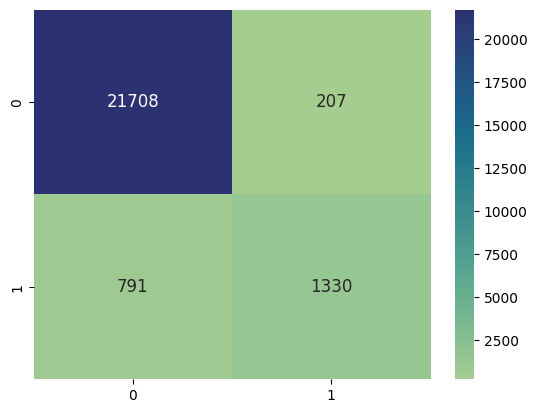

In [67]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

### 7.SVM

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

######################################################################
classifier = SVC(kernel='rbf', random_state = 0,C=.001)
classifier.fit(x_train, y_train)
acc_train = classifier.score(x_train,y_train)
print(acc_train)

y_pred = classifier.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)


######################################################################
classifier = SVC(kernel='poly', degree=3,random_state = 0,C=.01)
classifier.fit(x_train, y_train)
acc_train = classifier.score(x_train,y_train)
print(acc_train)

y_pred = classifier.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

######################################################################
classifier = SVC(kernel='sigmoid', gamma=.02,random_state = 0,C=500)
classifier.fit(x_train, y_train)
acc_train = classifier.score(x_train,y_train)
print(acc_train)

y_pred = classifier.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

### 8. K-means, **The Bonus Part**